In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
%matplotlib inline

In [3]:
path=r'./house_to_module2.csv'
df=pd.read_csv(path)
df.drop(['Unnamed: 0'],inplace=True,axis=1)
print('Done')

Done


In [4]:
df.head()

,Crime_rate,P_RL,P_NRL,CRSV,NOC,ANR,P_SUH,WDCA,PIRH,Tax_rate,P_TS,P_black,P_under,Style,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,0.416315,15.3,1.000000,4.98,Mediterranean,24.0
1,0.02731,20.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,0.340366,17.8,1.000000,9.14,European,21.6
2,0.02729,20.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,0.340366,17.8,0.989746,4.03,Elegant,34.7
3,0.03237,20.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,0.312236,18.7,0.994281,2.94,Pastoral,33.4
4,0.06905,20.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,0.312236,18.7,1.000000,5.33,Elegant,36.2


In [5]:
df.dtypes

Crime_rate    float64
P_RL          float64
P_NRL         float64
CRSV          float64
NOC           float64
ANR           float64
P_SUH         float64
WDCA          float64
PIRH          float64
Tax_rate      float64
P_TS          float64
P_black       float64
P_under       float64
Style          object
Price         float64
dtype: object

In [6]:
df[['P_under','Price']].corr()

,P_under,Price
P_under,1.000000,-0.737663
Price,-0.737663,1.000000


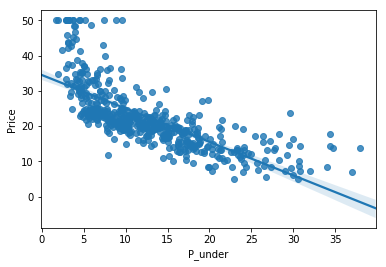

In [7]:
sns.regplot(x='P_under',y='Price',data=df)

['P_under', 'Price']


E:\InstallationDirectory\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


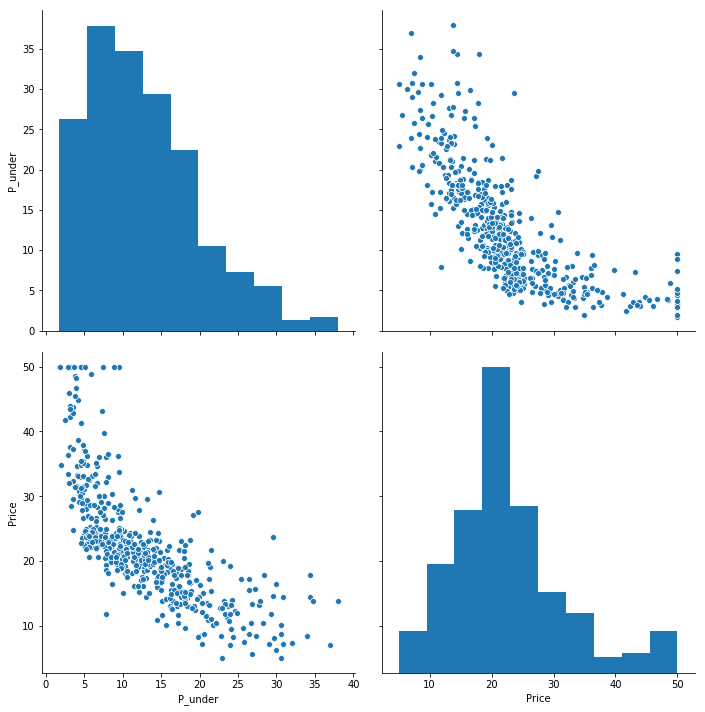

In [8]:
cols = ['P_under','Price']
#cols = df.columns.values
print(cols)
sns.pairplot(df[cols], size=5)

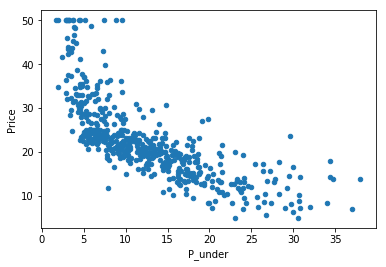

In [9]:
df.plot(kind='scatter',x='P_under',y='Price')

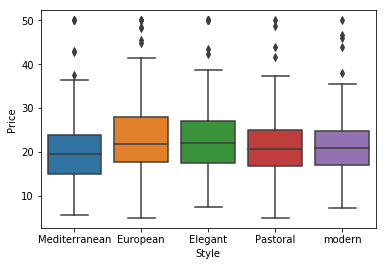

In [10]:
sns.boxplot(x="Style", y="Price", data=df)  # pastoral 田园  elegant 优雅

In [11]:
df.describe()

,Crime_rate,P_RL,P_NRL,CRSV,NOC,ANR,P_SUH,WDCA,PIRH,Tax_rate,P_TS,P_black,P_under,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,26.067194,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,0.574173,18.455534,0.898650,12.653063,22.532806
std,8.596783,16.945031,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,0.237042,2.164946,0.230020,7.141062,9.197104
min,0.006320,12.500000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,0.263010,12.600000,0.000806,1.730000,5.000000
25%,0.082045,20.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,0.392405,17.400000,0.945773,6.950000,17.025000
50%,0.256510,20.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,0.464135,19.050000,0.986243,11.360000,21.200000
75%,3.647422,20.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,0.936709,20.200000,0.998299,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.000000,22.000000,1.000000,37.970000,50.000000


In [12]:
df_group_one = df[['Style','Price']]
df_group_one = df_group_one.groupby(['Style'],as_index=False).mean()
df_group_one

,Style,Price
0,Elegant,23.767290
1,European,23.371154
2,Mediterranean,21.428283
3,Pastoral,22.026000
4,modern,21.915625


In [13]:
grouped_pivot=df_group_one.pivot(index='Style',columns=[1,1,1,1,1])
grouped_pivot

,Price
,1
,1
,1
,1
,1
Style,
Elegant,23.767290
European,23.371154
Mediterranean,21.428283
Pastoral,22.026000


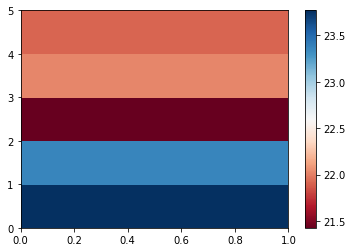

In [14]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

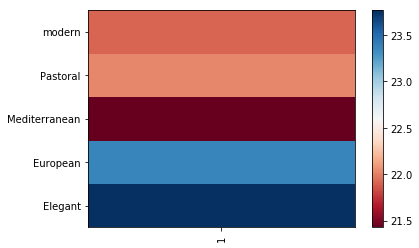

In [15]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [16]:
df.corr()

,Crime_rate,P_RL,P_NRL,CRSV,NOC,ANR,P_SUH,WDCA,PIRH,Tax_rate,P_TS,P_black,P_under,Price
Crime_rate,1.000000,-0.148325,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
P_RL,-0.148325,1.000000,-0.429887,-0.037889,-0.436334,0.260239,-0.501525,0.567259,-0.246929,-0.221724,-0.297223,0.127598,-0.349969,0.301417
P_NRL,0.404471,-0.429887,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CRSV,-0.055295,-0.037889,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOC,0.417521,-0.436334,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
ANR,-0.219940,0.260239,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
P_SUH,0.350784,-0.501525,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
WDCA,-0.377904,0.567259,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
PIRH,0.622029,-0.246929,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Tax_rate,0.579564,-0.221724,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
pearson_coef, p_value = stats.pearsonr(df['NOC'], df['Price'])
pearson_coef, p_value 

(-0.4273207723732826, 7.065041586254333e-24)

In [17]:
col_coef_pvalue=[]
for col in df.columns.values.tolist()[0:13]:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Price'])
    col_coef_pvalue.append([col,pearson_coef,p_value])
    #print(col,'\n======================\n',"the coef=", pearson_coef, " with a P-value of P =", p_value,sep='') 
col_coef_pvalue=pd.DataFrame(col_coef_pvalue,columns=['col_name','coef','p-value'])    #  coef降序
col_coef_pvalue['coef']=abs(col_coef_pvalue['coef'])
col_coef_pvalue.sort_values(['coef'],ascending=False,inplace=True,axis=0)
col_coef_pvalue

,col_name,coef,p-value
12,P_under,0.737663,5.081103e-88
5,ANR,0.695360,2.487229e-74
10,P_TS,0.507787,1.609509e-34
2,P_NRL,0.483725,4.900260e-31
9,Tax_rate,0.468536,5.637734e-29
4,NOC,0.427321,7.065042e-24
0,Crime_rate,0.385832,2.083550e-19
8,PIRH,0.381626,5.465933e-19
6,P_SUH,0.376955,1.569982e-18
11,P_black,0.333461,1.318113e-14


In [18]:
#p-value 升序
col_coef_pvalue.sort_values(['p-value'],ascending=True,inplace=True,axis=0)
col_coef_pvalue

,col_name,coef,p-value
12,P_under,0.737663,5.081103e-88
5,ANR,0.695360,2.487229e-74
10,P_TS,0.507787,1.609509e-34
2,P_NRL,0.483725,4.900260e-31
9,Tax_rate,0.468536,5.637734e-29
4,NOC,0.427321,7.065042e-24
0,Crime_rate,0.385832,2.083550e-19
8,PIRH,0.381626,5.465933e-19
6,P_SUH,0.376955,1.569982e-18
11,P_black,0.333461,1.318113e-14


In [19]:
grouped_test=df[['Style','Price']].groupby(['Style'])
grouped_test.head(2)

,Style,Price
0,Mediterranean,24.0
1,European,21.6
2,Elegant,34.7
3,Pastoral,33.4
4,Elegant,36.2
5,European,28.7
6,modern,22.9
7,Pastoral,27.1
11,modern,18.9
14,Mediterranean,18.2


In [20]:
df['Style'].unique()

array(['Mediterranean', 'European', 'Elegant', 'Pastoral', 'modern'],
      dtype=object)

In [21]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('Elegant')['Price'],
                              grouped_test.get_group('European')['Price'],
                             )
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.08282155148880466 , P = 0.7737946981580376


In [22]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('Pastoral')['Price'],
                              grouped_test.get_group('European')['Price'],
                              grouped_test.get_group('modern')['Price'],
                              grouped_test.get_group('Mediterranean')['Price'],
                              grouped_test.get_group('Elegant')['Price'],

                             )
print( "ANOVA results: F=", f_val, ", P =", p_val)


ANOVA results: F= 1.2412935974551587 , P = 0.2924064244022372


In [23]:
col_coef_pvalue

,col_name,coef,p-value
12,P_under,0.737663,5.081103e-88
5,ANR,0.695360,2.487229e-74
10,P_TS,0.507787,1.609509e-34
2,P_NRL,0.483725,4.900260e-31
9,Tax_rate,0.468536,5.637734e-29
4,NOC,0.427321,7.065042e-24
0,Crime_rate,0.385832,2.083550e-19
8,PIRH,0.381626,5.465933e-19
6,P_SUH,0.376955,1.569982e-18
11,P_black,0.333461,1.318113e-14


In [27]:
col_coef_pvalue['col_name']

12       P_under
5            ANR
10          P_TS
2          P_NRL
9       Tax_rate
4            NOC
0     Crime_rate
8           PIRH
6          P_SUH
11       P_black
1           P_RL
7           WDCA
3           CRSV
Name: col_name, dtype: object

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>P_under</li>
    <li>ANR</li>
    <li>P_TS</li>
    <li>P_NRL</li>
    <li>Tax_rate</li>
    <li>NOC</li>
</ul>
    
Categorical variables:
<ul>
    <li>Style</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>